In [3]:
import cv2
import numpy as np
from  matplotlib import pyplot as plt
from imp import reload 
import sys
import os
import concurrent.futures



In [70]:
def getDictInfo(element, test_tag, cnt, dictInfo):
    if (True in (element['tag'] == a for a in test_tag)) or (True in (a in element['tag'] for a in test_tag)):
        x = int(element['x'])
        y = int(element['y'])
        w = int(element['width'])
        h = int(element['height'])
        dictInfo.append([x,y,w,h])
        
        
def analyzeDict(img, test_tag):
    dictInfo=[]
    img_test = img.copy()
    ##94 elements
    cnt = 0
    for i in hierarchy_dict:
        cnt+=1
        print('i:',i["tag"], cnt)
        if "_EA@text" in i: print(i["_EA@text"], cnt)
        getDictInfo(i, test_tag, cnt, dictInfo)

        for j in i['child']:
            cnt+=1
            print('j:',j["tag"], cnt)
            if "_EA@text" in j: print(j["_EA@text"], cnt)
            getDictInfo(j, test_tag, cnt, dictInfo)

            for k in j['child']:
                cnt+=1
                print('k:',k["tag"], cnt)
                if "_EA@text" in k: print(k["_EA@text"], cnt)
                getDictInfo(k, test_tag, cnt, dictInfo)

                for l in k['child']:
                    cnt+=1
                    print('l:',l["tag"], cnt)
                    if "_EA@text" in l: print(l["_EA@text"], cnt)
                    getDictInfo(l, test_tag, cnt, dictInfo)

                    for m in l['child']:
                        cnt+=1
                        print('m:',m["tag"], cnt)
                        if "_EA@text" in m: print(m["_EA@text"], cnt)
                        getDictInfo(m, test_tag, cnt, dictInfo)

                        for n in m['child']:
                            cnt+=1
                            print('n:',n["tag"], cnt)
                            if "_EA@text" in n: print(n["_EA@text"], cnt)
                            getDictInfo(n, test_tag, cnt, dictInfo)

                            for o in n['child']:
                                cnt+=1
                                print('o:',o["tag"], cnt)
                                if "_EA@text" in o: print(o["_EA@text"], cnt)
                                getDictInfo(o, test_tag, cnt, dictInfo)



    print('total element num:', cnt)
    
    return dictInfo

In [204]:
##analyze taad dumped dict and experiment

##目前state dict有重複的：mail, spotify, messenger, chrome, pchome
##沒有的： fb, instagram, nba, ubereats, translate, youtube
import json
from allProcess import *
reload(sys.modules['allProcess'])
from allProcess import *

IMG_LIST = [1]
IMG_NUM = 13


# print('===========PROCESSING IMAGE NUMBER '+str(IMG_NUM)+'=============')

    
with open('./experiment/'+str(IMG_NUM)+'.json', 'r') as fp:
#with open('./experiment/data.json', 'r') as fp:
    j = json.load(fp)
hierarchy_dict = j['child']

img = cv2.imread('./experiment/'+str(IMG_NUM)+'.png', 1)
#img = cv2.imread('./experiment/currentScreenshot.png', 1)
height,width,_ = img.shape
print('shape:', height,width)
test_tag=['img','button']


dictInfo = analyzeDict(img, test_tag)
contours = allProcess(str(IMG_NUM), True)
#implement experiment設為true


shape: 2436 1125
i: div 1
j: div 2
k: XCUIElementTypeImage 3
k: button 4
header ic account 24x24 4
j: ['ul', 'div'] 5
k: ['XCUIElementTypeImage', 'div'] 6
k: div 7
l: div 8
m: XCUIElementTypeImage 9
m: ['div', 'button'] 10
l: XCUIElementTypeImage 11
l: div 12
l: XCUIElementTypeImage 13
l: div 14
l: ul 15
m: div 16
n: div 17
o: div 18
o: div 19
o: div 20
o: div 21
o: ['div', 'button'] 22
o: div 23
o: div 24
Hawks topple top-seeded 76ers, advance to East finals 24
o: div 25
Game 7: ATL 勝出系列賽 4-3 25
o: XCUIElementTypeImage 26
o: div 27
103 27
o: div 28
96 28
o: XCUIElementTypeImage 29
o: div 30
終場 30
o: img 31
o: div 32
5 Hawks 32
o: div 33
1 76ers 33
n: div 34
o: div 35
o: button 36
觀看 觀看 36
o: div 37
o: button 38
技術統計 技術統計 38
m: div 39
n: div 40
o: div 41
o: div 42
o: div 43
o: div 44
o: ['div', 'button'] 45
o: div 46
o: div 47
Booker dominates as Suns outlast Clippers in Game 1 47
o: div 48
Game 1: PHX 領先系列賽 1-0 48
o: XCUIElementTypeImage 49
o: div 50
114 50
o: div 51
120 51
o: XCUIEle

[[975, 147, 102, 102], [0, 264, 0, 0], [99, 1251, 3, 3], [477, 1470, 15, 27], [99, 1659, 462, 135], [561, 1659, 465, 135], [1053, 1296, 3, 3], [1584, 1515, 18, 27], [1053, 1704, 462, 135], [1665, 1749, 162, 48], [0, 1908, 1125, 810], [6, 2190, 213, 144], [231, 2190, 213, 144], [456, 2190, 213, 144], [681, 2190, 213, 144], [906, 2190, 213, 144]]
[[[501, [506, 497, 502, -1]], [495, 156, 134, 84], ['NBA', 0]], [[497, [501, 484, 498, -1]], [988, 160, 76, 76], ['&', 40]], [[484, [497, 482, 485, -1]], [0, 258, 1125, 128], ['WESDANONESTon)GOH!SE9.00ener', 30]], [[87, [93, 85, 88, 78]], [702, 1427, 229, 109], ['96', 92]], [[85, [87, 84, 86, 78]], [334, 1449, 131, 65], ['03 1', 96]], [[76, [78, 74, 77, 73]], [105, 1665, 451, 123], ['觀看', 96]], [[74, [76, -1, 75, 73]], [569, 1665, 450, 122], ['技術統計', 95]], [[44, [45, 42, -1, -1]], [1048, 1232, 77, 612], ['|', 90]], [[42, [44, 29, 43, -1]], [26, 1940, 200, 56], ['精選故事', 87]], [[29, [42, 25, 30, -1]], [0, 2022, 1125, 171], ['', 0]], [[6, [7, 5, -1

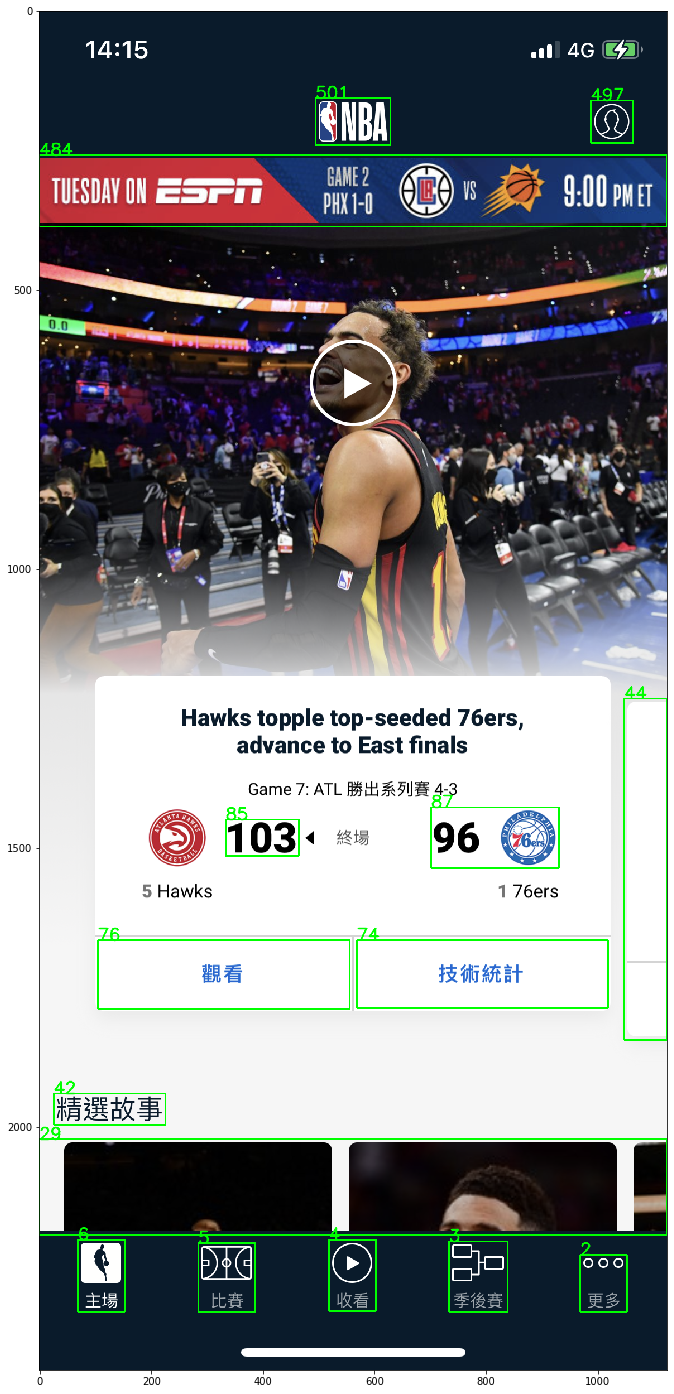

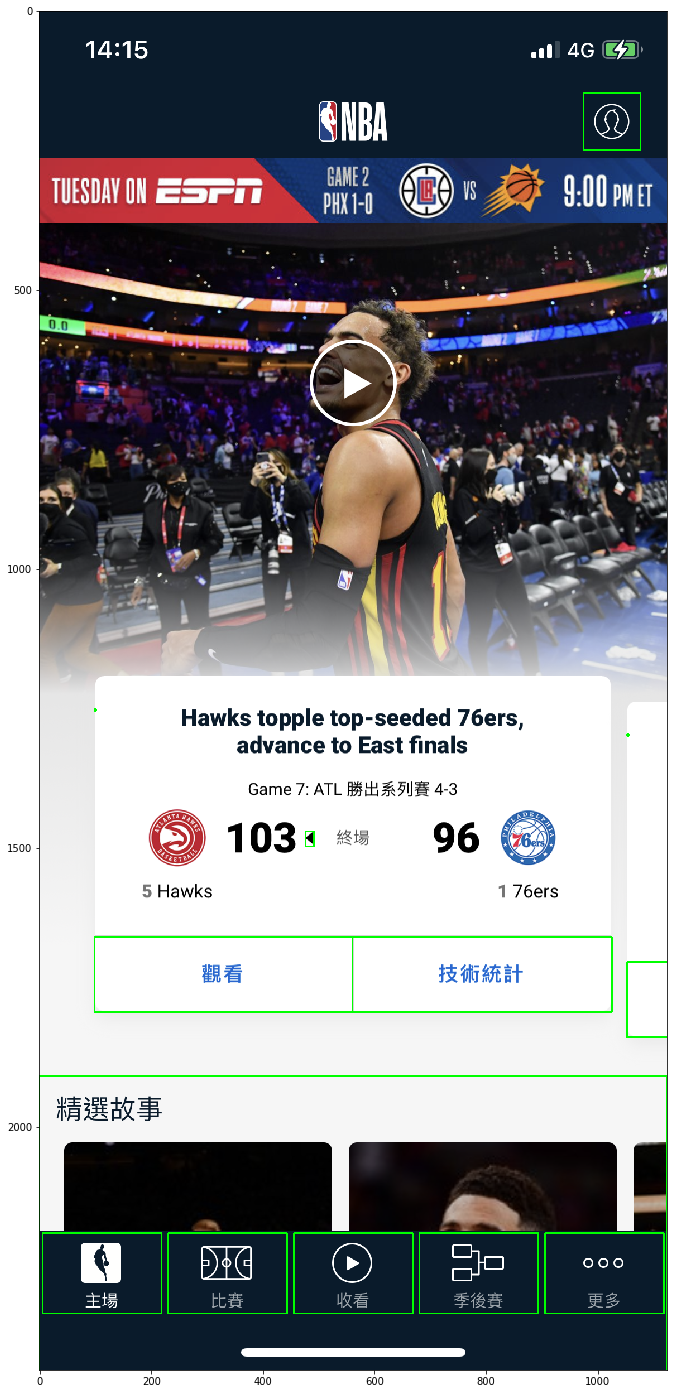

In [206]:
#去掉contours和dictInfo重疊的部分，如果bug修好就不用
# for d in dictInfo.copy():
#     for c in contours:
#         if d == c[1]:
#             dictInfo.remove(d)

contours = [c for c in contours if c[1][1]+c[1][3]>95]
##刪掉時間和電池圖示

print(dictInfo)
print(contours)

clone = img.copy()
for i,c in enumerate(contours):
    x,y,w,h = c[1]
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(clone, str(c[0][0]), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite('experiment/processed_'+str(IMG_NUM)+'.jpg', clone)
plt.figure(figsize=(50,25))
clone = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)
plt.imshow(clone)

img_test = img.copy()
for i,d in enumerate(dictInfo):
    x,y,w,h = d
    cv2.rectangle(img_test, (x, y), (x + w, y + h), (0, 255, 0), 2)
    #cv2.putText(img_test, str(cnt), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite('experiment/target_'+str(IMG_NUM)+'.jpg', img_test)
plt.figure(figsize=(50,25))
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)

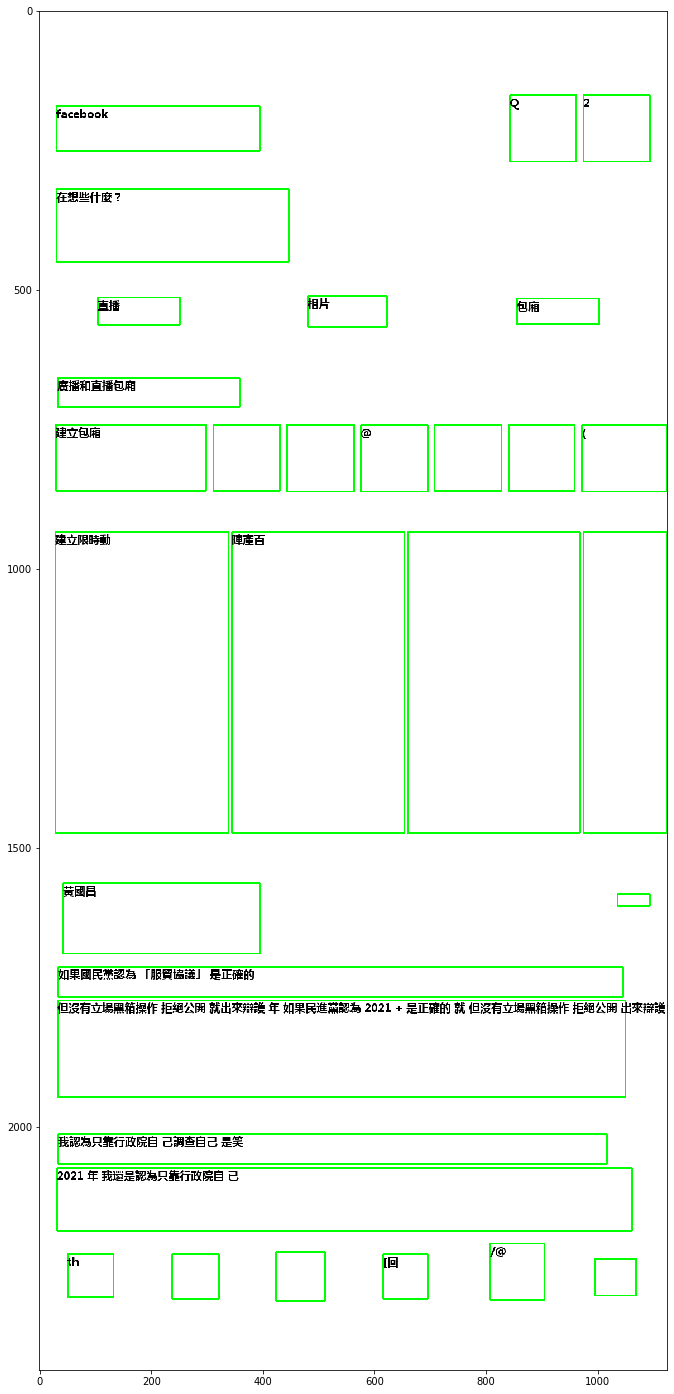

In [98]:
from PIL import Image, ImageDraw, ImageFont
clone5 = img.copy()
clone5[:][:][:] = 255
for i, c in enumerate(contourInfo):
    x,y,w,h = c[1]
    cv2.rectangle(clone5, (x, y), (x + w, y + h), (0, 255, 0), 2)

clone5 = cv2.cvtColor(clone5, cv2.COLOR_BGR2RGB)
pil5 = Image.fromarray(clone5)
for i, c in enumerate(contourInfo):
    x,y,w,h = c[1]
    if c[2][1] >=70 \
        not(not(False in (s in sym for s in c[2][0])) \
        or (not(False in (s in alpha+sym for s in c[2][0])) and len(c[2][0])<=2) \
        or len(c[2][0])<=1 or c[2][0]==len(c[2][0])*c[2][0][0]):
        draw = ImageDraw.Draw(pil5)
        fontText = ImageFont.truetype('msyhbd.ttf' , 20, encoding="utf-8")
        draw.text((x, y), c[2][0], (0, 0, 0), font=fontText)


#pil5.save('experiment/contour&text_'+str(IMG_NUM)+'.jpg')
plt.figure(figsize=(50,25))
plt.imshow(pil5)

In [18]:
%%time

tp=0
fp=0
fn=0
tn=0

for i in range(0,width+1):
    for j in range(0,height+1):
        for c in contourInfo:
            flag_b = 0 ##用來判斷有沒有在c裡，有的話會變1
            if i in range(c[1][0], c[1][0]+c[1][2]+1) and j in range(c[1][1], c[1][1]+c[1][3]+1):
                ##(i,j)在c裡
                flag_a = 0 ##用來判斷在c裡的有沒有在d裡，有的話會變1
                flag_b = 1
                for d in dictInfo:
                    if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
                        ##(i,j)在c裡且在d裡
                        ##true positive
                        tp+=1
                        flag_a = 1
                        #print([i,j],': tp')
                        break
                if flag_a ==0:
                    ##(i,j)在c裡但不在任何d裡
                    ##false positive
                    fp+=1
                    #print([i,j],': fp')
                    break
                else: break
                    
            if flag_b == 0:
                flag_c = 0 ##用來判斷不在c裡的有沒有在d裡，有的話會變1
                for d in dictInfo:
                    if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
                        ##(i,j)不在任何c裡但是在d裡
                        ##false negative
                        fn+=1
                        flag_c = 1
                        #print([i,j],': fn')
                        break
                if flag_c ==0:
                    ##(i,j)不在任何c裡也不在任何d裡 
                    ##true negative
                    tn+=1
                    #print([i,j],': tn')
                    break
                else: break

                
print(tp,fp,fn,tn)

34900 5060 2187852 516250
CPU times: user 28.4 s, sys: 129 ms, total: 28.6 s
Wall time: 29.8 s


In [9]:
print(tp,fp,fn,tn)
print(img.size)


14400 0 1441993 1287669
8221500


In [7]:
%%time
##facebook:(tp,fp,fn,tn) = (14400 0 1441993 1287669)
##instagram:(tp,fp,fn,tn)=34900 5060 2187852 516250

# a=[(x,y) for x in range(width+1) for y in range(height+1)]
# a=[(x,y) for x in range(5+1) for y in range(5+1)]
# print(len(a))
# NUM_THREADS = os.cpu_count()
# NUM_THREADS = 8
# print('Logical Processors: ',NUM_THREADS)

# tp=0
# fp=0
# fn=0
# tn=0

# def checkPixel(pixel,contourInfo,dictInfo):
#     for c in contourInfo:
#         flag_b = 0 ##用來判斷有沒有在c裡，有的話會變1
#         if i in range(c[1][0], c[1][0]+c[1][2]+1) and j in range(c[1][1], c[1][1]+c[1][3]+1):
#             ##(i,j)在c裡
#             flag_a = 0 ##用來判斷在c裡的有沒有在d裡，有的話會變1
#             flag_b = 1
#             for d in dictInfo:
#                 if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
#                     ##(i,j)在c裡且在d裡
#                     ##true positive
#                     tp+=1
#                     flag_a = 1
#                     print([i,j],': tp',tp)
#                     break
#             if flag_a ==0:
#                 ##(i,j)在c裡但不在任何d裡
#                 ##false positive
#                 fp+=1
#                 print([i,j],': fp',fp)
#                 break
#             else: break

#         if flag_b == 0:
#             flag_c = 0 ##用來判斷不在c裡的有沒有在d裡，有的話會變1
#             for d in dictInfo:
#                 if i in range(d[0], d[0]+d[2]+1) and j in range(d[1], d[1]+d[3]+1):
#                     ##(i,j)不在任何c裡但是在d裡
#                     ##false negative
#                     fn+=1
#                     flag_c = 1
#                     print([i,j],': fn',fn)
#                     break
#             if flag_c ==0:
#                 ##(i,j)不在任何c裡也不在任何d裡 
#                 ##true negative
#                 tn+=1
#                 print([i,j],': tn',tn)
#                 break
#             else: break
# with concurrent.futures.ThreadPoolExecutor(NUM_THREADS) as executor:
#     futures = {executor.submit(checkPixel, pixel,contourInfo, dictInfo): pixel for pixel in a}
#     concurrent.futures.wait(futures)

36
Logical Processors:  8
CPU times: user 4.92 ms, sys: 9.95 ms, total: 14.9 ms
Wall time: 21.1 ms


In [182]:
sym = '!"#$%&\'()*+,-./:;<=>?@[]^_`{|}~©®'
sym = list(sym)
alpha = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
alpha = list(alpha)
c=[2,2,['4G',0]]
xxx = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', ']', '^', '_', '`', '{', '|', '}', '~', '©', '®']
alpha = list(alpha)

not(not(False in (s in sym for s in c[2][0])) \
or (not(False in (s in alpha+sym for s in c[2][0])) and len(c[2][0])<=2) \
or len(c[2][0])<=1 or c[2][0]==len(c[2][0])*c[2][0][0])



True